#### Pandas

In [1]:
import pandas as pd

In [2]:
#dta = pd.read_csv("http://vincentarelbundock.github.com/Rdatasets/csv/car/Duncan.csv", index_col=0)
#dta.index.name = "occupation"
#print dta.info()

#### Mean, Median, Mode

In [3]:
#dta.mean()

In [4]:
#dta.median()

In [5]:
#dta.groupby("type").size()

#### What is a probability?

* this is a real question
* standard interpretation - **frequentist probability**
  * the probability of an event is the frequency with which it occurs in a large (infinite) number of repeated trials
  * data are a repeatable random sample; parameters are fixed
  * parameters are unknown but estimable
  * get the parameters from the data and explore properties given they're fixed
  * how much could they have changed given a different realization of the data from the population?
  * underlies experimental design. experiments are controlled and repeatable
* a competing paradigm - **Bayesian probability**
  * how do our beliefs change when confronted with data?
  * data are fixed; parameters are unknown
  * we have some idea about the parameters before the data are seen
  * get the data and update our parameters in a coherent way
  * all experiments rely on assumptions and all statistical models are subjective

*Everything below assumes the frequentist interpretation of probability. Though we will likely discuss some Bayesian methods.*

#### Variance and Covariance

* The **expectation** (also **first moment** or **mean**) of a random variable is a weighted average
* The weights are given by the probability associated with each possible value of the variable for a discrete variable
  * If the variable is continuous, we use the word density in place of probability
* For example, assume lottery tickets are `$`1. 200,000 tickets are sold, and there is guaranteed winner of `$`100,000
  * The expected value of your ticket is 
    $$-1 \left(\frac{199,999}{200,000}\right) + 99,999\left(\frac{1}{200,000}\right) = -.5$$

* The **variance** of a random variable is a measure of how spread out the values are
* It is computed as the sum of squared distances of each value from the expected value (the mean $\mu$)
$$\operatorname{var}(\{x_i\})=\sigma^2(\{x_i\})=\mathbb{E}((\{x_i\}-\mu)^2)=\sum_{i=1}^N(x_i-\mu)^2$$
* The square root of the variance, $\sigma$ is known as the **standard deviation**

* We can generalize the notion of variance to two variables
* The  **covariance** is a measure of *statistical* dependence between two variables
* It is computed as
$$\operatorname{cov}(\{x_i\},\{y_i\})=\mathbb{E}((\{x_i\}-\mu)^2)\mathbb{E}((\{y_i\}-\upsilon)^2)$$
where $\upsilon$ is the mean of the set $\{y_i\}$
* If two variables are **independent** then their covariance is zero.
* Positive covariance means as one variable goes up, the other goes up
* Negative covariance means as one variable goes up, the other goes down
* A **covariance** matrix is the pairwise covariance of each variable in a dataset
* For example, given a dataset $X$ that contains three variables $x_1,x_2,x_3$ the covariance matrix would be
$$\Sigma = \left[\begin{array}{ccc} \cr
\operatorname{cov}(x_1,x_1) & \operatorname{cov}(x_1,x_2) & \operatorname{cov}(x_1,x_3) \cr
\operatorname{cov}(x_2,x_1) & \operatorname{cov}(x_2,x_2) & \operatorname{cov}(x_2,x_3) \cr
\operatorname{cov}(x_3,x_1) & \operatorname{cov}(x_3,x_2) & \operatorname{cov}(x_3,x_3) \cr
\end{array}\right]
$$
* This matrix is symmetric $\operatorname{cov}(x_i, x_j) = \operatorname{cov}(x_j, x_i)$
* The elements onthe  are the variances $\operatorname{cov}(x_i, x_i) = \operatorname{var}(x_i)$ 

## Probability Distributions

* A probability distribution assigns a probability to possible outcomes of a random variable
* For continuous random variables this is called a **probability density function**
  * A continuous random variable can take on any value within a given interval
* For discrete random variables this is called a **probability mass function**
  * A discrete random variable takes on a countable (finite or infinite) number of distinct values $\mathcal{X}$

#### Probability Mass Function

* a probability mass is some function $f$ that is everywhere non-negative
* and that sums to 1
* Mathematically the probability mass function of a discrete random variable X is a real-valued function $f(x)$ 
* 
such that
$$P(X=x_i)=f(x_i)$$
where
$$f(x)\geq0\forall x \in \mathcal{X}$$
$$\sum_xf(x)=1$$

#### Probability Density Function

* a probability density is some function $f$ that is everywhere non-negative
* and that integrates to 1 over the entire space
* Mathematically the probability density function of X is a function $f(x)$ that satisfies
$$P(a\leq X\leq b)=\int_a^bf(x)dx$$

where

$$f(x) \geq 0 \forall x$$ 

and 

$$\int_{-\infty}^{\infty}f(x)dx=1$$

* Note $P(X=c)=0$ for the continuous case. Why?
* It follows that the use of strict inequality is unimportant.
  * $P(a < X < b) = P(a \leq X < b) = P(a \leq X \leq b) = P(a < X \leq b)$

#### Cumulative Distribution Function

* the cumulative distribution function $F(X)$ gives the probability that $X$ will take on a value less than some $x$
$$F(X) = P(X \leq x) = \int_{-\infty}^{x}f(y)dy$$
* Note that the following properties hold
* $P(X > a) = 1 - F(a)$
* $P(a \leq x \leq b) = F(b) - F(a)$

#### Gaussian (Normal) Distribution

* the univariate Gaussian (or Normal) Distribution has the familiar bell-shaped curve
* Notation $x \sim N(\mu,\sigma^2)$
* $N(0,1)$ is commonly referred to as the standard normal
$$f(x)=\frac{1}{2\sqrt{2\pi}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [11]:
x = np.linspace(-7, 7, 1000)
pdf01 = stats.norm.pdf(x)
pdf02 = stats.norm.pdf(x, scale=5**.5)

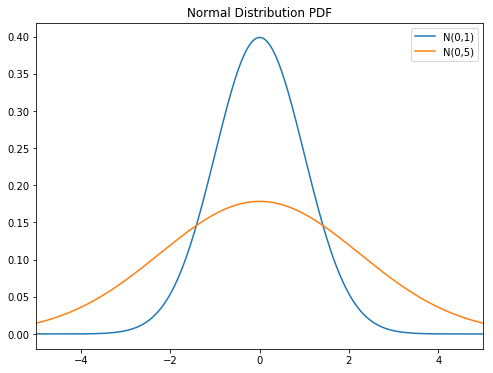

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, pdf01, label="N(0,1)")
ax.plot(x, pdf02, label="N(0,5)")
ax.set_xlim(-5,5)
ax.legend()
ax.set_title("Normal Distribution PDF");
plt.show()

In [13]:
cdf01 = stats.norm.cdf(x)
cdf02 = stats.norm.cdf(x, scale=5**.5)

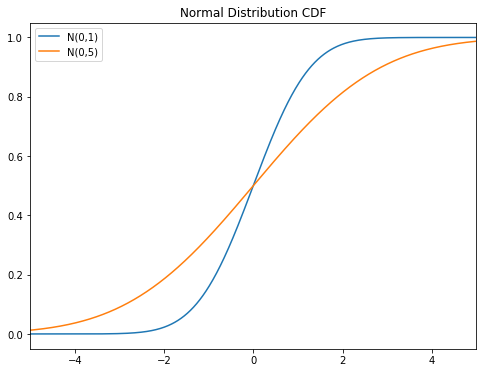

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, cdf01, label="N(0,1)")
ax.plot(x, cdf02, label="N(0,5)")
ax.set_xlim(-5,5)
ax.legend(loc="upper left")
ax.set_title("Normal Distribution CDF");
plt.show()

* Given that $X \sim N(0,5)$ what's the probability that $x_i<-3$
* $Pr(x < -3)=F(-3)$

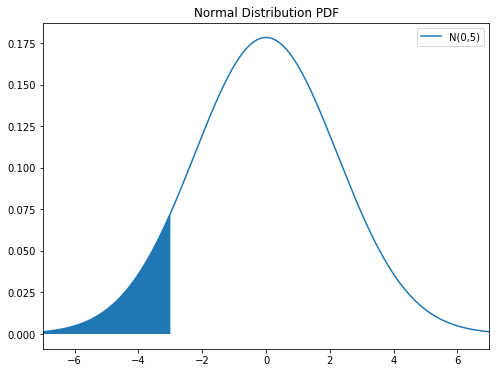

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, pdf02, label="N(0,5)")
ax.set_xlim(-7,7)
ax.legend()
ax.set_title("Normal Distribution PDF");
x_fill = np.linspace(-7, -3)
ax.fill_between(x_fill, stats.norm.pdf(x_fill, scale=5**.5));
plt.show()

In [17]:
print("Prob(x < -3) = %2.4f %%" % (stats.norm.cdf(-3, scale=5**.5)*100))

Prob(x < -3) = 8.9856 %


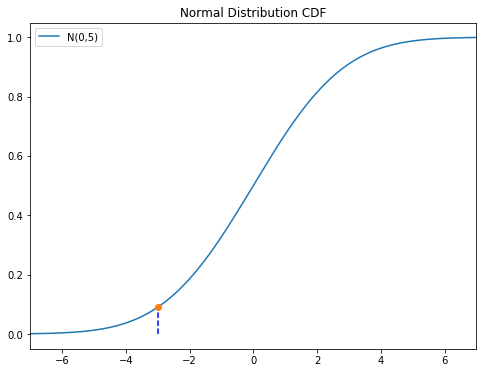

In [18]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, cdf02, label="N(0,5)")
ax.set_xlim(-7,7)
ax.plot(-3, stats.norm.cdf(-3, scale=5**.5), 'o')
ax.vlines(-3, 0, stats.norm.cdf(-3, scale=5**.5), 
          linestyle='--', color='blue')
ax.legend(loc="upper left")
ax.set_title("Normal Distribution CDF");
plt.show()

What's the value at which 5% of all variables are less than it? We want to use the inverse of the CDF, the percent point function.

In [19]:
stats.norm.ppf(.05)

-1.6448536269514729

In [20]:
alpha = .05

In [21]:
stats.norm.ppf(alpha/2), stats.norm.ppf((1-alpha/2)) # two-tailed

(-1.9599639845400545, 1.959963984540054)

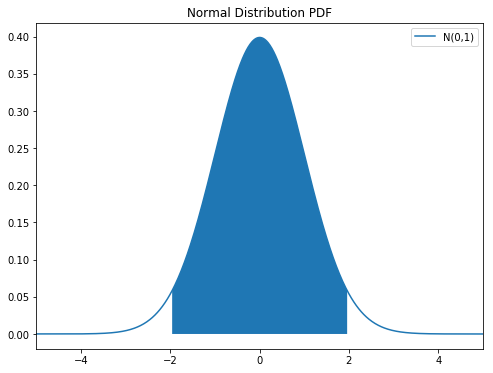

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, pdf01, label="N(0,1)")
ax.set_xlim(-5,5)
ax.legend()
ax.set_title("Normal Distribution PDF");
x_fill = np.linspace(stats.norm.ppf(alpha/2), stats.norm.ppf((1-alpha/2)))
ax.fill_between(x_fill, stats.norm.pdf(x_fill));
plt.show()

#### Preliminary definitions

* A **population** includes all possible values of interest
  * A **population distribution** is the "true" distribution of all of these values
  * For example, the population distribution of a coin toss is 50/50
* A **sample** is only an observed portion of a population
  * For example, a coin toss sample might be {H, H, H, T}.
  * A **sampling distribution** is the distribution of a statistic from *all possible* samples of the same size from a population
* The **law of large numbers** states that as the of sample size grows, the **sample mean** converges to the expected value of the population
  * Let's take an example
  * Say we rolled one die 500 times and took the cumulative mean

In [25]:
np.random.seed(100)
die_rolls = np.random.randint(1, 6+1, size=500)
denom = np.arange(1., len(die_rolls)+1)
running_mean = np.cumsum(die_rolls)/denom

In [26]:
die_rolls[:5]

array([1, 1, 4, 1, 3])

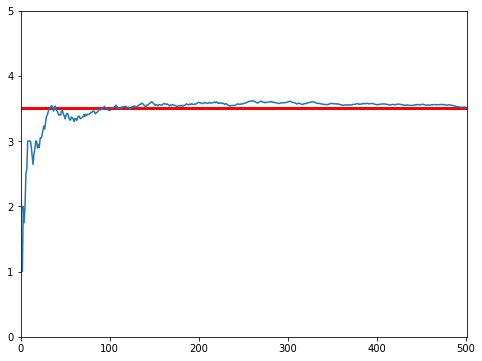

In [28]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlim(0, len(denom)+1)
ax.set_ylim(0,5)
ax.plot(denom, running_mean);
ax.hlines(3.5, 0, len(denom)+1, color='r', lw=3);
plt.show()

#### Why is the Normal Distribution so popular?

* Popularity due in part to the **Central Limit Theorem**
* Take any distribution with finite mean and variance
* Take $n$ independent draws (samples) from this distribution
* If $S_n$ is the sum of these independent draws, then the sampling distribution of $S_n$ tends to the Normal distribution as $n\rightarrow \infty$ 

Take the probabilty distribution of a the throw of one die.

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(np.arange(.5, 6.5), [1/6.]*6, width=.85)
ax.set_ylim(0, .35);

In [30]:
np.random.seed(1234)

Roll 1 die 1000 times.

In [32]:
one_die = np.random.randint(1, 6+1, size=1000)

Roll 2 dice 1000 times.

**Review question:** What does this summation do?

In [34]:
two_die = np.random.randint(1, 6+1, size=(1000,2)).sum(1)

Roll 3 dice 1000 times.

In [35]:
three_die = np.random.randint(1, 6+1, size=(1000,3)).sum(1)

Roll 4 dice 1000 times.

In [36]:
four_die = np.random.randint(1, 6+1, size=(1000,4)).sum(1)

Roll 5 dice 1000 times.

In [37]:
five_die = np.random.randint(1, 6+1, size=(1000,5)).sum(1)

Roll 50 dice 1000 times.

In [38]:
fifty_die = np.random.randint(1, 6+1, size=(1000,50)).sum(axis=1)

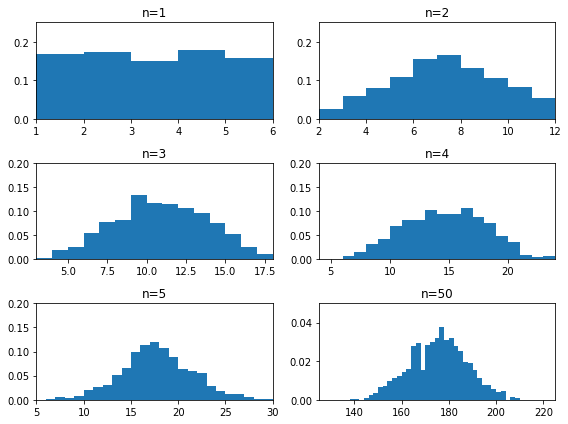

In [40]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,6))
axes[0,0].hist(one_die, bins=range(1,8), normed=True)
axes[0,0].set_xlim(1,6)
axes[0,0].set_ylim(0, .25);
axes[0,0].set_title("n=1")

axes[0,1].hist(two_die, bins=range(2,14), normed=True)
axes[0,1].set_xlim(2,12)
axes[0,1].set_ylim(0, .25);
axes[0,1].set_title("n=2")

axes[1,0].hist(three_die, bins=np.arange(3,20), normed=True)
axes[1,0].set_xlim(3,18)
axes[1,0].set_ylim(0, .20);
axes[1,0].set_title("n=3")

axes[1,1].hist(four_die, bins=np.arange(4,26), normed=True)
axes[1,1].set_xlim(4, 24)
axes[1,1].set_ylim(0, .20);
axes[1,1].set_title("n=4")

axes[2,0].hist(five_die, bins=np.arange(5,32), normed=True)
axes[2,0].set_xlim(5, 30)
axes[2,0].set_ylim(0, .20);
axes[2,0].set_title("n=5")

axes[2,1].hist(fifty_die, bins=np.arange(50,50*6+2, 2), normed=True)
axes[2,1].set_xlim(125, 225)
axes[2,1].set_ylim(0, .05);
axes[2,1].set_title("n=50");

fig.tight_layout()
plt.show()

Another example, say we had some very odd dice with the following probability distribution.

In [41]:
odd_dice = np.array([1/3., 0, 1/6., 1/6., 0, 1/3.])

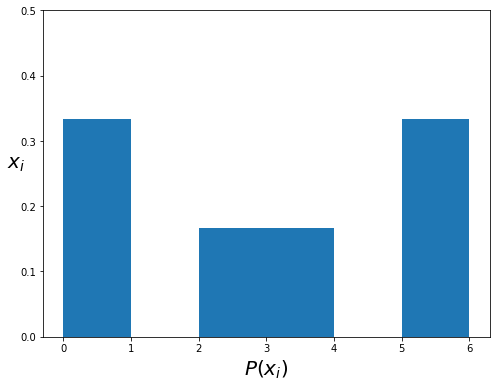

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(np.arange(.5, 6.5, 1), odd_dice,
       width=1)
ax.xaxis.set_label_text("$P(x_i)$", fontdict=dict(fontsize=20))
ax.yaxis.set_label_text("$x_i$", fontdict=dict(fontsize=20), rotation="horizontal")
ax.set_ylim(0, .5);
plt.show()

#### Aside

* **Binomial distribution**
  * Discrete distribution of the number of successes in a sequence of $n$ trials with a binary outcome with $P(x_i=1)=p$
  * So it has parameters $n$ and $p$
  * Example: fair coin toss, $p=.5$
* **Multinomial distribution**
  * Multivariate generalization of the binomial distribution
  * $n$ independent trials each of which has $k$ possible outcomes with probability $P(x_i=j)=p_j$ for outcome $j$
  * So it has parameters $n$ and $\boldsymbol{p}$ where $\boldsymbol{p}=(p_1,\dots,p_k)$
  * Example: fair dice roll, $k=6$ and $p=(1/6,1/6,1/6,1/6,1/6,1/6)$

In [43]:
sides = np.arange(1,7.)

In [44]:
np.random.seed(12345)

In [45]:
roll = np.random.multinomial(4, odd_dice)

In [47]:
print(roll)

[3 0 0 0 0 1]


In [48]:
print("Mean: %2.4f" % (np.sum(roll*sides)/4.))

Mean: 2.2500


In [49]:
roll = np.random.multinomial(4, odd_dice)
print("Roll: %s" % roll)
print("Mean: %2.4f" % (np.sum(roll*sides)/4))

Roll: [2 0 1 1 0 0]
Mean: 2.2500


In [50]:
roll = np.random.multinomial(4, odd_dice)
print("Roll: %s" % roll)
print("Mean: %2.4f" % (np.sum(roll*sides)/4))

Roll: [2 0 2 0 0 0]
Mean: 2.0000


In [51]:
roll = np.random.multinomial(4, odd_dice)
print("Roll: %s" % roll)
print("Mean: %2.4f" % (np.sum(roll*sides)/4))

Roll: [0 0 0 2 0 2]
Mean: 5.0000


In [52]:
roll10000 = np.random.multinomial(4, odd_dice,
                                  size=10000)

In [53]:
means = np.sum(roll10000 * sides, axis=1)/4.

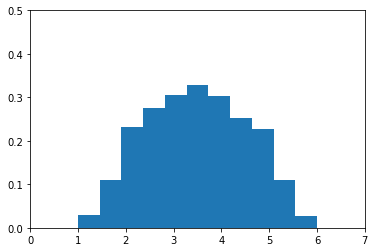

In [54]:
fig, ax = plt.subplots()
#n, bins, patches = ax.hist(means, bins=np.arange(1, 7, .2), normed=True)
n, bins, patches = ax.hist(means, bins=11, normed=True)
ax.set_xlim(0,7)
ax.set_ylim(0,.5);
plt.show()

In [55]:
roll10000 = np.random.multinomial(20, odd_dice, 
                                  size=10000)
means = np.sum(roll10000 * sides, axis=1)/20.

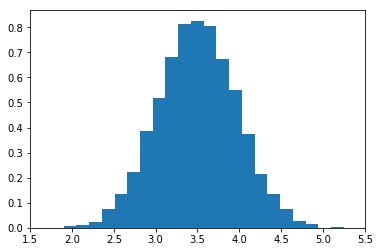

In [56]:
fig, ax = plt.subplots()
pdf, bins, patches = ax.hist(means, bins=23, normed=True)
ax.set_xlim(1.5, 5.5);
plt.show()

In [57]:
roll10000 = np.random.multinomial(30, odd_dice, 
                                  size=10000)
means = np.sum(roll10000 * sides, axis=1)/30.

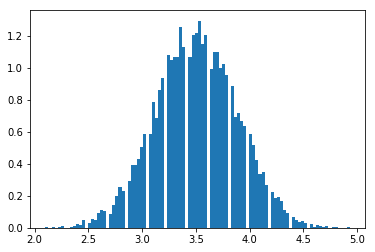

In [58]:
fig, ax = plt.subplots()
n, bins, patches = ax.hist(means, bins=100, normed=True)
plt.show()

* This remarkable fact is what makes the Normal distribution so ubiquitous
* Even when we do not know the underlying probability distribution, we can use the Normal distribution for **statistical inference**
* Statistical inference allows us to draw conclusions from random data
  * For example, given an observed mean of 1.5 from a single sample of 20 dice rolls, we can ask how likely is it that this observation came from a fair die?

#### Uniform Distribution

* $U(a,b)$ - has parameters $a$ and $b$
* both continuous and discrete versions
* used often in simulation experiments
* can be used to sample from arbitrary distributions (more later)

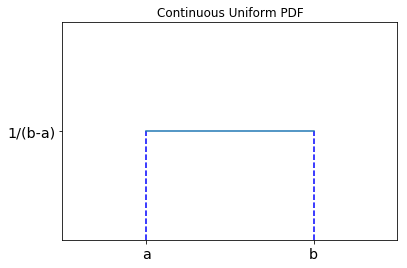

In [59]:
fig, ax = plt.subplots()
ax.plot((0,1), (1,1))
ax.vlines(0, 0, 1, linestyle='--', color='b')
ax.vlines(1, 0, 1, linestyle='--', color='b')
ax.set_ylim(0,2)
ax.set_xlim(-.5, 1.5)
ax.set_title("Continuous Uniform PDF")
ax.set_yticks([1])
ax.set_yticklabels(["1/(b-a)"], fontsize="x-large")
ax.set_xticks([0,1])
ax.set_xticklabels(["a", "b"], fontsize="x-large");
ax.grid(False);
plt.show()

#### Student's t distribution

* Fun fact - derivation published under pseudonym Student by worker at Guinness Brewery in Dublin. They were using a "t-test" to test quality of raw materials.
* Continuous distribution
* Has one parameter $\upsilon$ - degrees of freedom
* Very similar to Normal distribution but it has fatter "tails" - i.e., it's lower and wider
* Approaches normal distribution as $\upsilon\rightarrow\infty$
* Often used for inference on sample statistics when the population statistics are not known to account for extra uncertainty
* Many sample distribution statistics have a t-distribution for moderate sample sizes

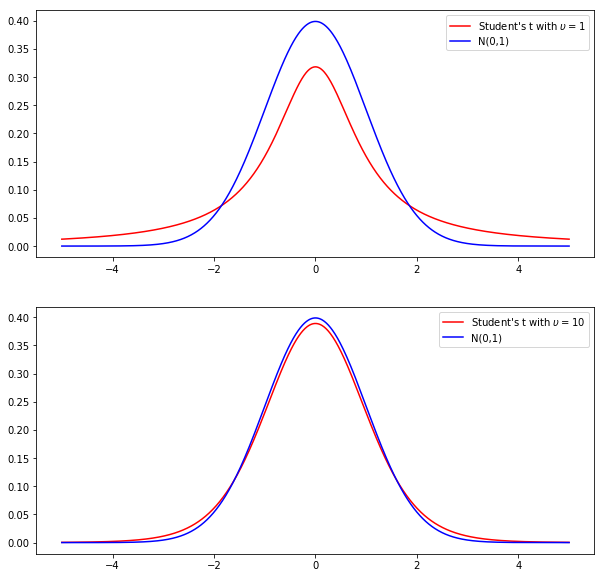

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
t_dist1 = stats.t(1)
x = -np.linspace(-5, 5, 1000)
axes[0].plot(x, t_dist1.pdf(x), 'r', label=r"Student's t with $\upsilon=1$")
axes[0].plot(x, stats.norm.pdf(x), 'b', label="N(0,1)")
axes[0].legend()

t_dist30 = stats.t(10)
axes[1].plot(x, t_dist30.pdf(x), 'r', label=r"Student's t with $\upsilon=10$")
axes[1].plot(x, stats.norm.pdf(x), 'b', label="N(0,1)")
axes[1].legend();
plt.show()

#### Poisson Distribution

* Discrete distribution
* Has one parameter $\lambda>0$
* Often used to model counts - "arrivals" that take place in a given time interval
  * Number of requests to a server
  * Number of loan defaults
  * Number of mutations in a strand of DNA
  * Number of soldiers in the Prussian army killed accidentally by horse kick

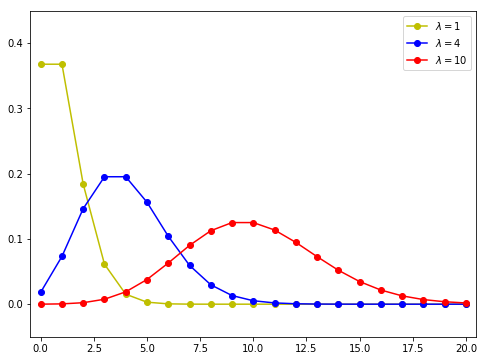

In [62]:
fig, ax = plt.subplots(figsize=(8,6))
x = np.arange(21)
ax.plot(x, stats.poisson(1).pmf(x), 'y', marker="o", label="$\lambda=1$")
ax.plot(x, stats.poisson(4).pmf(x), 'b', marker="o", label="$\lambda=4$")
ax.plot(x, stats.poisson(10).pmf(x), 'r', marker="o", label="$\lambda=10$")
ax.set_xlim(-.5, 20.5)
ax.set_ylim(-.05, .45)
ax.legend(numpoints=1);
plt.show()

#### Exponential Distribution

* continuous distribution
* Has one parameter $\lambda>0$ often called a "rate"
* Defined for positive numbers. We say it has a **support** of $X\in[0,\infty)$
* Often used to model lengths of arrival times of a Poisson process. For example,
  * Time until next radioactive decay
  * Time until a server is hit by a request
  * Time until default on a loan payment

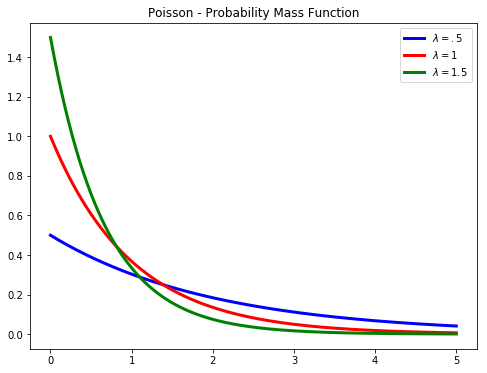

In [66]:
x = np.linspace(0.0000001, 5, 1000)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, stats.expon(scale=1/.5).pdf(x), 'b', lw=3, label=r"$\lambda=.5$")
ax.plot(x, stats.expon(scale=1.).pdf(x), 'r', lw=3, label=r"$\lambda=1$")
ax.plot(x, stats.expon(scale=1/1.5).pdf(x), 'g', lw=3, label=r"$\lambda=1.5$")
ax.set_title("Poisson - Probability Mass Function")
ax.legend();
plt.show()

#### Other common distributions

* [Multivariate normal](http://en.wikipedia.org/wiki/Multivariate_normal_distribution)
  * multivariate generalization of Normal
* [logistic distribution](http://en.wikipedia.org/wiki/Logistic_distribution)
  *continuous
  * similar to Normal
  * heavier tails
  * used often in discrete choice regression models
* [$\chi^2$-distribution](http://en.wikipedia.org/wiki/Chi-squared_distribution)
  * continuous
  * distribution of the sum of the squares of $k$ indendepent normal distributions
  * widely used in statistical inference
* [F-distribution](http://en.wikipedia.org/wiki/F-distribution)
  * continuous
  * ratio of two independent $\chi^2$-distributions
* [log-normal distribution](http://en.wikipedia.org/wiki/Log-normal_distribution)
  * continuous
  * support - $X\in[0,\infty)$
  * distribution of a variable whose logarithm is normally distributed
  * often used, for example, for stock price returns in finance
* [Pareto distribution](http://en.wikipedia.org/wiki/Pareto_distribution)
  * continuous
  * an example of a [Power law distribution](http://en.wikipedia.org/wiki/Power_law#Power-law_probability_distributions)
  * used to model "heavy tails" or "extreme events"
    * wealth inequality - few have much
    * city sizes - few cities, many villages
    * file size of TCP traffic - many small files, few large ones 
    * maximum rainfall days
* [Binomial distribution](http://en.wikipedia.org/wiki/Binomial_distribution) - discussed above
* [Multinomial distribution](http://en.wikipedia.org/wiki/Multinomial_distribution) - discussed above
* [Bernoulli distribution](http://en.wikipedia.org/wiki/Bernoulli_distribution) - same as binomial for the number of trials $n=1$.
* [Negative binomial distribution](http://en.wikipedia.org/wiki/Negative_binomial_distribution)
  * discrete
  * support $x\in{0,1,2,3,\dots}$
  * Similar to Poisson but allows mean and variance to be different
* [Beta distribution](http://en.wikipedia.org/wiki/Beta_distribution)
  * continuous
  * support - $X\in[0,1]$
  * used in wavelet analysis
  * used in Bayesian statistics
* [Dirichlet distribution](http://en.wikipedia.org/wiki/Dirichlet_distribution)
  * multivariate generalization of Beta
  * used in Bayesian statistics

#### Generating Random Numbers

* using `numpy`
* `numpy` provides many distributions in `numpy.random`

Uniform [0,1)

In [67]:
np.random.rand(3, 2)

array([[ 0.31147049,  0.75432329],
       [ 0.74293897,  0.37910849],
       [ 0.51020211,  0.72349327]])

In [68]:
np.random.random((3, 2))

array([[ 0.00725936,  0.43119321],
       [ 0.29301769,  0.31176272],
       [ 0.34498158,  0.26522125]])

In [69]:
np.random.random_sample((3, 2))

array([[ 0.03590008,  0.88777235],
       [ 0.60413116,  0.33424056],
       [ 0.80708753,  0.63331173]])

In [70]:
np.random.sample((3,2))

array([[ 0.85696806,  0.7965559 ],
       [ 0.60656134,  0.87809882],
       [ 0.29489453,  0.57142795]])

In [71]:
np.random.ranf((3,2))

array([[ 0.50177361,  0.89587285],
       [ 0.82364094,  0.75959215],
       [ 0.37524385,  0.60950399]])

Uniform [a,b)

In [74]:
np.random.randint(0, 4+1, size=(3,2))

array([[0, 3],
       [2, 2],
       [4, 0]])

Standard Normal - N(0,1)

In [75]:
np.random.randn(3, 2)

array([[-1.27297927, -0.77915538],
       [ 0.64603967,  1.46489851],
       [ 0.9794304 , -1.32550941]])

In [76]:
np.random.standard_normal((3,2))

array([[-0.65107703,  0.41342877],
       [ 0.31432712,  1.75248881],
       [-1.0151237 ,  0.26880746]])

In [77]:
np.random.normal(size=(3,2))

array([[-0.31786555,  1.40080967],
       [-0.89494092, -0.24172062],
       [ 0.09687407,  1.58644273]])

Normal - $N(\mu, \sigma)$

In [78]:
np.random.normal(3, 5**.5, size=(3,2))

array([[ 4.75592529,  2.72941502],
       [ 1.99550147,  3.67857903],
       [ 4.32913594,  3.19909128]])

In [79]:
np.random.normal(3, 5**.5, size=1000).mean()

3.0595344760396288

In [80]:
np.random.normal(3, 5**.5, size=1000).var()

4.9739127581996252

Binomial - Coin Toss - Binom(.5)

In [81]:
np.random.binomial(25, .5) # number of successes

12

Repeated Bernoulli - 25 samples from Binom(.5)

In [82]:
np.random.binomial(1, .5, size=25)

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0])

Fair dice roll

In [84]:
np.random.randint(1, 6+1, size=50)

array([6, 1, 3, 3, 2, 1, 5, 4, 1, 3, 6, 3, 5, 4, 6, 5, 2, 1, 3, 4, 3, 3, 1,
       3, 1, 5, 5, 5, 5, 6, 1, 6, 2, 3, 6, 5, 1, 2, 4, 6, 1, 5, 3, 4, 4, 1,
       3, 3, 4, 2])

In [86]:
np.random.randint(1, 6+1, size=50).astype(float)

array([ 2.,  3.,  2.,  6.,  5.,  4.,  1.,  6.,  5.,  4.,  5.,  4.,  5.,
        1.,  3.,  2.,  3.,  5.,  3.,  4.,  6.,  6.,  2.,  4.,  5.,  3.,
        1.,  6.,  2.,  5.,  3.,  6.,  1.,  3.,  5.,  3.,  3.,  1.,  3.,
        1.,  5.,  2.,  2.,  3.,  4.,  4.,  6.,  3.,  1.,  1.])

There are many more including

* beta
* multinomial
* gamma
* dirichlet
* chisquare
* expon
* f
* lognorm
* and more

#### scipy.stats

If you can't find the distribution you need in `numpy.random` or you want to do more than generate random variables, use `scipy.stats`

In [87]:
from scipy import stats

You can find the available [discrete distributions](http://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete.html#discrete-random-variables) and [continuous distributions](http://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous.html#continuous-random-variables) in the documentation. There is a [tutorial on the stats module](http://docs.scipy.org/doc/scipy/reference/tutorial/stats.html) as well. Some of which will be covered here as needed.

For the below examples, we will use the following distribtion

In [88]:
t_dist = stats.t(5)

`t_dist` is what is called a *frozen distribution* (this is just scipy parlance). It is "frozen" with the argument 5. This argument is the degrees of freedom parameter needed to form a Student's t Distribution.

If we had forgotten that `t` takes an argument, we can check.

In [89]:
stats.t.numargs

1

Each distribution also takes an optional `loc` and `scale` parameter keywords. The defaults are 0 and 1. We won't cover much more about this now. If interested go read about [scale parameters](http://en.wikipedia.org/wiki/Scale_parameter) or take a stats class.

#### Random Number Generation

We can generate random numbers from any of the distributions.

In [90]:
t_dist.rvs(size=5)

array([ 0.69082566,  1.31156965, -1.1500698 , -1.1414273 , -1.13356084])

#### Probability Density (Mass) Function

We can calculate the PDF (PMF) using the `pdf` `(pmf)`

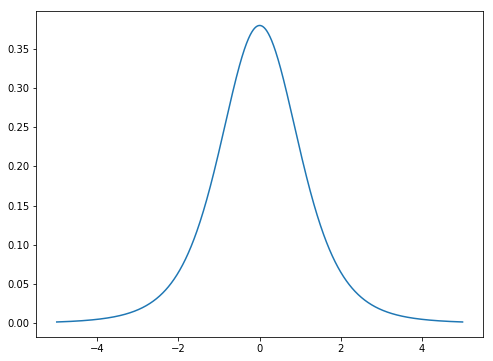

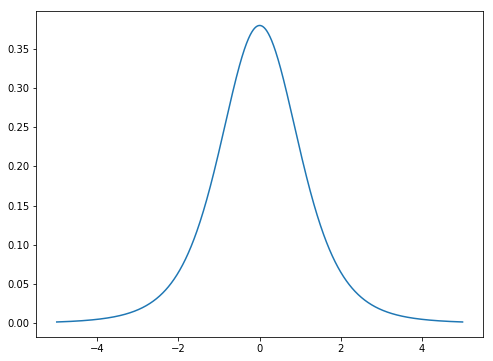

In [92]:
x = np.linspace(-5, 5, 1000)
pdf_x = t_dist.pdf(x)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, pdf_x);
plt.show()

#### Cumulative Density Function

Likewise the CDF

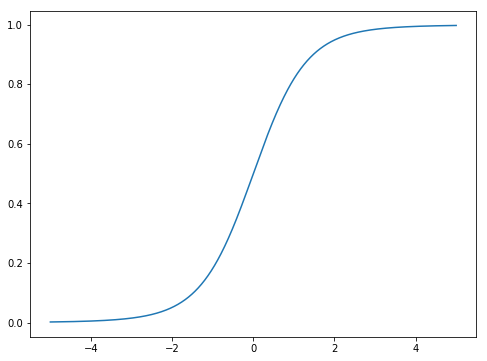

In [93]:
x = np.linspace(-5, 5, 1000)
cdf_x = t_dist.cdf(x)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, cdf_x);
plt.show()

#### Percent Point Function (Inverse CDF)

* as we discussed above, we might be interested in the inverse CDF also known as the percent point function or inverse distribution function.
* since the CDF tell us the probability that a variable is below a given point
* for the inverse, we start with the probability and corresponding point on the CDF
* you can think of it like an upper bound on a variable

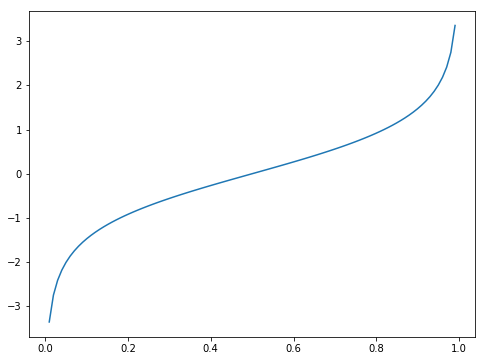

In [94]:
x_percent = np.linspace(0, 1, 100)
icdf = t_dist.ppf(x_percent)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x_percent, icdf);
plt.show()

#### Survival Function

* The survival function, as the name suggests, can tell us the probability an entity has survived
* Assume that $Pr(X < x)=F(x)$ gives the probability that a failure event has happened at a given point
* The probability that a failure has not occurred is $Pr(X > x) = 1 - F(x)$
* Why not just use 1 - CDF(X)? Survivor function can be better behaved in the tails.

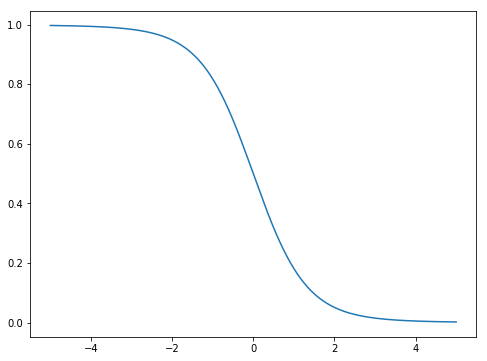

In [95]:
sf_x = t_dist.sf(x)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, sf_x);
plt.show()

#### Inverse Survival Function

* like the inverse CDF, the inverse survival function gives the value of the survival function for a given percentage

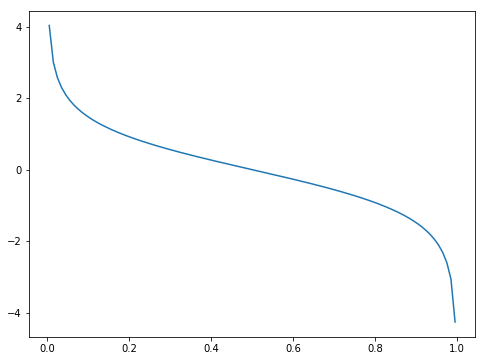

In [96]:
isf_x = t_dist.isf(x)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, isf_x);
plt.show()

#### Entropy

* Information Theory gives us the concept of Shannon's entropy
* A measure of uncertainty in a given variable
  - For example, the uniform is the distribution of maximum entropy
* Shannon used entropy to calculate the bounds of lossless compression in communications while working for AT&T
$$-\int_{-\infty}^{\infty}f(x)\log(f(x))dx$$

or 

$$-\sum_{i=1}^Np_i\log(p_i)$$

In [97]:
t_dist.entropy()

array(1.627502672416313)

#### Stats

Stats provides the mean and variance, and, optionally, (Fisher's) skew and (Fisher's) kurtosis

In [98]:
t_dist.stats()

(array(0.0), array(1.6666666666666667))

In [99]:
t_dist.stats(moments="mvsk")

(array(0.0), array(1.6666666666666667), array(0.0), array(6.0))

In [100]:
stats.norm.moment(4)

3.0

#### Moments

Moments gives us the non-central moments of the distribution.

In [101]:
t_dist.moment(3)

0.0

#### PyMC

If you still can't find the distribution you need, you can find some more exotic distributions that are used in Bayesian statistics in the [PyMC package](http://pymc-devs.github.com/pymc/#).